Module 3, Lab 1 - Frequency Claims
==================================

In this lab, we will examine how to analyze data for a frequency claim.
A frequency claim is where the level of a single variable is reported.

In this example, you are analyzing data from a local coffee company. You
wish to know how many coffee beverages are consumed by the average
customer in a day. These customers are surveyed and the data are
produced. You load the data from a CSV file (in the datasets github folder for
this lab).

The packages are loaded as a first step. You can safely ignore any deprecation warning which may appear depending on the version of the `statsmodels` package being loaded. 

In [1]:
#### LOAD PACKAGES ####
## Use inline magic command so plots appear in the data frame
%matplotlib inline

## Next the packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import skew
import statsmodels.stats.api as sms

ImportError: cannot import name 'TimeSeries'

Next, we load our data as a Pandas data frame:

In [2]:
#### LOAD DATA ####
dat = pd.read_csv("datasets/cupsdat.csv")

You inspect the data using the Pandas `columns` attribute and `head()` function:

In [3]:
print(dat.columns)

dat.head()

Index(['Unnamed: 0', 'count'], dtype='object')


,Unnamed: 0,count
0,1,1
1,2,7
2,3,3
3,4,3
4,5,2


There is an ID variable called `Unnamed` and a variable indicating the number of
beverages named `count`.

The first thing to do is to explore the variable. The Pandas `describe()`
method has many useful features.

In [4]:
dat['count'].describe()

count    100.000000
mean       2.450000
std        1.725478
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: count, dtype: float64

Here we see that scores range from 0-7, with a median (50% quantile) of 2.

Exploring Counts
================

We can also use the `value_counts()` method on a Pandas series (single column of vector):

In [5]:
dat['count'].value_counts()

1    27
2    25
3    17
5     9
0     8
4     7
6     5
7     2
Name: count, dtype: int64

This gives us a sense of the distribution. The values are in the left column and the counts in the right column. 

Often, stakeholders want percentages. This is easy to accomplish, provided you know how many responses you have. The number of rows in the data frame can be returned as the first value of the shape attribute:

In [6]:
dat.shape[0]

100

Or, you could ask for the `len()` of the `dat$count` variable:

In [7]:
len(dat['count'])

100

However, I would avoid these as there could be missing values in the data frame. Treating missing values in Pandas data frames is a bit complicated as there can be multiple ways missing values are coded. The simple general recipe for finding and treating missing values is:
1. Determine how missing values are coded. They might be coded as `numpy.nan` (not a number), `numpy.inf` (infinity) or some other code.
2. Convert all missing values to `numpy.nan` values.
3. Use the Pandas `dropna()` method.   

Following this recipe, the percentages of each value can be given by dividing each count by
the total is computed as shown.

In [8]:
## Remove rows with nan without making copy of the data frame
dat.dropna(axis = 0, inplace = True) 

## Now get the counts into a data frame sorted by the number
count_frame = dat['count'].value_counts()
count_frame = pd.DataFrame({'number':count_frame.index, 'counts':count_frame}).sort_values(by = 'number')

## Compute the percents for each number
n = len(dat['count'])
count_frame['percents'] = [100* x/n for x in count_frame['counts']]

## Print as a nice table
count_frame[['number', 'percents']]

,number,percents
0,0,8.0
1,1,27.0
2,2,25.0
3,3,17.0
4,4,7.0
5,5,9.0
6,6,5.0
7,7,2.0


Finally, it can sometimes be helpful to generate a cumulative
percentage. This can be done with the `cumsum()` method:

In [11]:
## Add a cumsum dat
count_frame['cumsums'] = count_frame['percents'].cumsum()
## Print as a nice table
count_frame[['number', 'percents', 'cumsums']]

,number,percents,cumsums
0,0,8.0,8.0
1,1,27.0,35.0
2,2,25.0,60.0
3,3,17.0,77.0
4,4,7.0,84.0
5,5,9.0,93.0
6,6,5.0,98.0
7,7,2.0,100.0


We see here easily that 60% of the sample has consumed 2 drinks per day
or fewer. This is a very handy little chart.

Histogram
=========

The most common data visualization is a histogram:

(array([  8.,  27.,  25.,   0.,  17.,   7.,   0.,   9.,   5.,   2.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

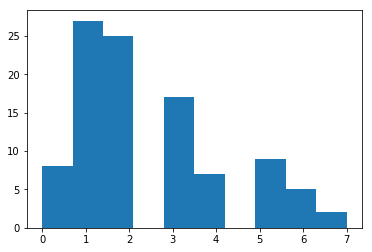

In [12]:
plt.hist(dat['count'])

![](M3_Lab1_-_Frequency_files/figure-markdown_strict/unnamed-chunk-12-1.png)

We see here that the most common score is 1 and that that data has considerable skew. But, notice there are gaps in the histogram bars. You know from the frequency table that there should be no gaps. 

The problem with the above histogram is that the default number of bins was used. Using 8 bins (for the 8 possible count values) will give a more representative histogram. 

(array([  8.,  27.,  25.,  17.,   7.,   9.,   5.,   2.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

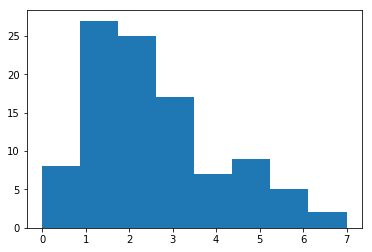

In [13]:
plt.hist(dat['count'], bins = 8)

![](M3_Lab1_-_Frequency_files/figure-markdown_strict/unnamed-chunk-13-1.png)

This looks both professional and more accurate. Changing plot properties can change your perception of data.

To make a better graph for a presentation you can add plot attributes, such as axis labels and a title:

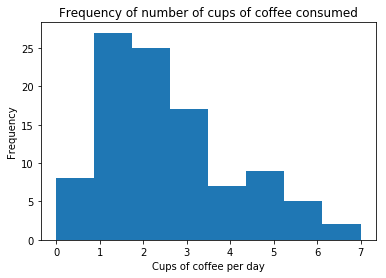

In [14]:
plt.hist(dat['count'], bins = 8)
plt.title('Frequency of number of cups of coffee consumed')
plt.xlabel('Cups of coffee per day')
plt.ylabel('Frequency')


Central Tendency
================

Assuming you want to provide a one-number summary, you can provide an
average. However, we see here given the skew that the mean will be
biased upwards.

Using the `skew()` function from the `scipy.stats` package, we can see this is
a modestly skewed distribution:

In [15]:
skew(dat['count'])

0.7666956887374972

This is within acceptable range for many purposes (any analyses start to
worry when skew reaches somewhere between 0.80-2.0). You can compute the mean and median of an array using the Numpy `mean()` and `median()` functions:

In [16]:
print(np.mean(dat['count']))
print(np.median(dat['count']))

2.45
2.0


Before you finish, you might want to put a confidence interval around
the mean. You can use the `CI()` command from the `Rmisc` package,
which works well for analysis when you plan to analyze the mean:

In [17]:
sms.DescrStatsW(list(dat['count'])).tconfint_mean()

NameError: name 'sms' is not defined

If you wished to provide a CI for a median, or if your data are
proportions or some other format than these, there are many easy options
that can be found with a brief web search, similar to the above.

Conclusion
==========

In this case, we can make a frequency claim: most people, on average
consume 1-2 cups of coffee per day.